In [108]:
import pandas as pd 
import numpy as np
import seaborn as sns
import math
from matplotlib.ticker import AutoMinorLocator,FormatStrFormatter

## Functions to convert data

In [2]:
def mm_to_phi(d):
    """this function converts an array/list of grain seive sizes in mm to phi scale and returns the phi reading for sedimentological analysis"""
   
    phi=[]
    for i in d:
        phi.append(round(-(math.log2(i)/math.log2(2)),2))
    
    return phi

In [105]:
def bed_to_100(x):
    """This is used to scale beds that are less than 100 in total weight to 100"""
    
    bed =[]
    total=sum(x)
    for i in x:
        bed.append(round(((i/total) *100),2))
    return bed

In [104]:
def cummulate_bed(bed):
    """this function returns the cummulative score of an array (0-100)"""
    from itertools import accumulate
   
    cum_beds=[]
    
    cum_bed=list(accumulate(bed))
    for i in cum_bed:
        cum_beds.append(round(i,2))
    return cum_beds

In [106]:
def percentiles(bed_data):
    """
    This get the percentile for the data passed. 
    it returns  a dataframe of the percentage passing,percentile of the data
    and the bed_data.
    """
    sed_percentile=[]
    bed=bed_data
   
    sed_passing=[]
    
    sedi_passing=[5,16,25,50,75,84,95,99.9]
    for i in sedi_passing:
        sed_percentile.append(round(np.percentile(bed_data,i),2))
    
#     sedi_passing=[5,25,50,75,84,95]
    for i in sedi_passing:
        x=str(i)
        sed_passing.append(x +'%')
    percentiles= dict(zip(sed_passing,sed_percentile))
   
    return sed_percentile,sed_passing,percentiles

In [3]:
gr_sieve_size= np.array([2,1.18,.85,.425,.300,.150,.075,.063],dtype='float64')
phi=mm_to_phi(gr_sieve_size)

## Data of beds

In [4]:
phi

[-1.0, -0.24, 0.23, 1.23, 1.74, 2.74, 3.74, 3.99]

In [7]:

#Beds for Uturu outcrop

bed_A= [2.6,12.4,17.4,41.1,9.9,10,4.2,1]
# bed_A=np.array(bed_A)
bed_B=[1.6,6.3,11.5,39.4,21.3,14.5,3.4,0.6]

bed_D=[7.5,15.4,12.5,28.5,15,15.1,3.6,1.0]

bed_E=[0.8,3.5,7.5,37.9,26.3,18.1,3.7,1.1]


bed_G=[3.9,9.4,10.4,35.4,23.1,14.2,24,.3]

bed_H= [0.6,4.0,8.0,45.9,25.4,11.4,4.4,0.4]

In [8]:
uturu_bed_A=bed_to_100(bed_A)
uturu_bed_B=bed_to_100(bed_B)
uturu_bed_D=bed_to_100(bed_D)
uturu_bed_E=bed_to_100(bed_E)
uturu_bed_G=bed_to_100(bed_G)
uturu_bed_H=bed_to_100(bed_H)



uturu_bed_A,uturu_bed_B,uturu_bed_D,uturu_bed_E,uturu_bed_G,uturu_bed_H

([2.64, 12.58, 17.65, 41.68, 10.04, 10.14, 4.26, 1.01],
 [1.62, 6.39, 11.66, 39.96, 21.6, 14.71, 3.45, 0.61],
 [7.61, 15.62, 12.68, 28.9, 15.21, 15.31, 3.65, 1.01],
 [0.81, 3.54, 7.58, 38.32, 26.59, 18.3, 3.74, 1.11],
 [3.23, 7.79, 8.62, 29.33, 19.14, 11.76, 19.88, 0.25],
 [0.6, 4.0, 7.99, 45.85, 25.37, 11.39, 4.4, 0.4])

In [9]:
bed_B=[1.6,6.3,11.5,39.4,21.3,14.5,3.4,0.6]
uturu_bed_B=bed_to_100(bed_B)

In [11]:
uturu_cum_bed_A=cummulate_bed(uturu_bed_A)
uturu_cum_bed_B=cummulate_bed(uturu_bed_B)
uturu_cum_bed_D=cummulate_bed(uturu_bed_D)
uturu_cum_bed_E=cummulate_bed(uturu_bed_E)
uturu_cum_bed_G=cummulate_bed(uturu_bed_G)
uturu_cum_bed_H=cummulate_bed(uturu_bed_H)


uturu_cum_bed_E

[0.81, 4.35, 11.93, 50.25, 76.84, 95.14, 98.88, 99.99]

In [12]:
import matplotlib.pyplot as plt

from matplotlib import style


style.use('ggplot')

In [13]:
phi

[-1.0, -0.24, 0.23, 1.23, 1.74, 2.74, 3.74, 3.99]

In [14]:
import math

In [15]:
np.percentile(uturu_cum_bed_A,50)

79.57

In [17]:
def Data_Frame(q,phi,bed_data):
    """
    Passing the dictionary, from the percentile function, 
    the phi scale list/array.
    the bed_data.
    """
    
    

    Outcrop_Bed_data= dict(zip(phi,bed_data))
    Outcrop_Bed= pd.DataFrame(Outcrop_Bed_data.items(), columns= ['Phi_scale','Bed_thickness'])
    
    percentile_table=pd.DataFrame(q.items(),columns=['Percentiles','Percentile_Passings' ])
    
    
    Out=Outcrop_Bed.join(percentile_table)
    
    
    return Out

In [18]:
x1,z1,q1=percentiles(uturu_cum_bed_H)
x2,z2,q2=percentiles(uturu_cum_bed_G)
x3,z3,q3=percentiles(uturu_cum_bed_E)
x4,z4,q4=percentiles(uturu_cum_bed_D)
x5,z5,q5=percentiles(uturu_cum_bed_B)
x6,z6,q6=percentiles(uturu_cum_bed_A)
q5

{'5%': 3.86,
 '16%': 9.41,
 '25%': 16.76,
 '50%': 70.43,
 '75%': 96.8,
 '84%': 98.98,
 '95%': 99.79,
 '99.9%': 100.0}

In [19]:
uturu_bed_A= Data_Frame(q6,phi,uturu_cum_bed_A)
uturu_bed_B= Data_Frame(q5,phi,uturu_cum_bed_B)
uturu_bed_D= Data_Frame(q4,phi,uturu_cum_bed_D)
uturu_bed_E= Data_Frame(q3,phi,uturu_cum_bed_E)
uturu_bed_G= Data_Frame(q2,phi,uturu_cum_bed_G)
uturu_bed_H= Data_Frame(q1,phi,uturu_cum_bed_H)

uturu_bed_E

,Phi_scale,Bed_thickness,Percentiles,Percentile_Passings
0,-1.00,0.81,5%,2.05
1,-0.24,4.35,16%,5.26
2,0.23,11.93,25%,10.04
3,1.23,50.25,50%,63.54
4,1.74,76.84,75%,96.08
5,2.74,95.14,84%,98.43
6,3.74,98.88,95%,99.60
7,3.99,99.99,99.9%,99.98


In [20]:
#Techincal COllege


bed_C= [2.3,5.6,7.7,21.0,13.5,35.9,12,1.6]
bed_E = [10.8,21.8,16.4,36.7,3.9,6.3,1.2,0]
bed_G = [3.9,10.1,9.3,35.4,23.2,15.3,2.4,0.3]

In [21]:
Tech_coll_C=bed_to_100(bed_C)
Tech_coll_E=bed_to_100(bed_E)
Tech_coll_G=bed_to_100(bed_G)


In [22]:
Tech_coll_C=cummulate_bed(Tech_coll_C)
Tech_coll_E=cummulate_bed(Tech_coll_E)
Tech_coll_G=cummulate_bed(Tech_coll_G)

In [23]:
x2,z2,q2=percentiles(Tech_coll_G)
x3,z3,q3=percentiles(Tech_coll_E)
x4,z4,q4=percentiles(Tech_coll_C)

q2,q3,q4

({'5%': 7.44,
  '16%': 15.13,
  '25%': 20.99,
  '50%': 70.37,
  '75%': 97.9,
  '84%': 99.41,
  '95%': 99.9,
  '99.9%': 100.0},
 {'5%': 18.98,
  '16%': 35.6,
  '25%': 46.24,
  '50%': 90.27,
  '75%': 99.08,
  '84%': 99.86,
  '95%': 100.01,
  '99.9%': 100.01},
 {'5%': 4.28,
  '16%': 8.86,
  '25%': 13.73,
  '50%': 43.52,
  '75%': 89.34,
  '84%': 96.93,
  '95%': 99.43,
  '99.9%': 99.98})

In [24]:
tech_bed_C= Data_Frame(q4,phi,Tech_coll_C)
tech_bed_E= Data_Frame(q3,phi,Tech_coll_E)
tech_bed_G= Data_Frame(q2,phi,Tech_coll_G)

tech_bed_E

,Phi_scale,Bed_thickness,Percentiles,Percentile_Passings
0,-1.00,11.12,5%,18.98
1,-0.24,33.57,16%,35.60
2,0.23,50.46,25%,46.24
3,1.23,88.26,50%,90.27
4,1.74,92.28,75%,99.08
5,2.74,98.77,84%,99.86
6,3.74,100.01,95%,100.01
7,3.99,100.01,99.9%,100.01


In [25]:
tech_bed_C

,Phi_scale,Bed_thickness,Percentiles,Percentile_Passings
0,-1.00,2.31,5%,4.28
1,-0.24,7.93,16%,8.86
2,0.23,15.66,25%,13.73
3,1.23,36.74,50%,43.52
4,1.74,50.29,75%,89.34
5,2.74,86.33,84%,96.93
6,3.74,98.38,95%,99.43
7,3.99,99.99,99.9%,99.98


In [107]:
#The function for the plot is below

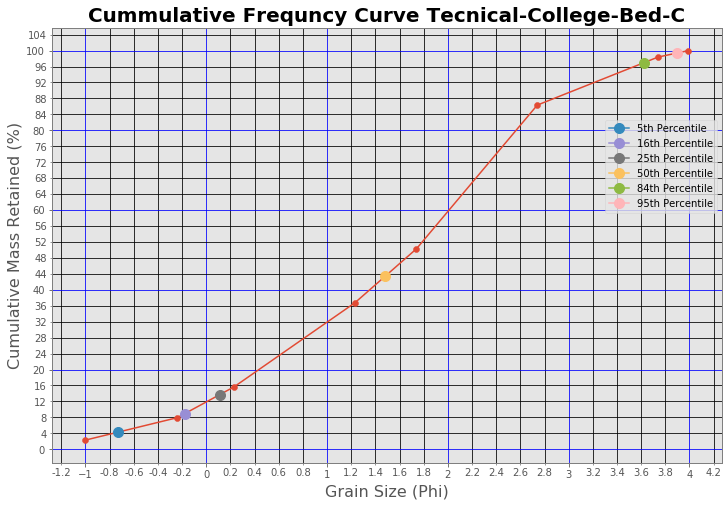

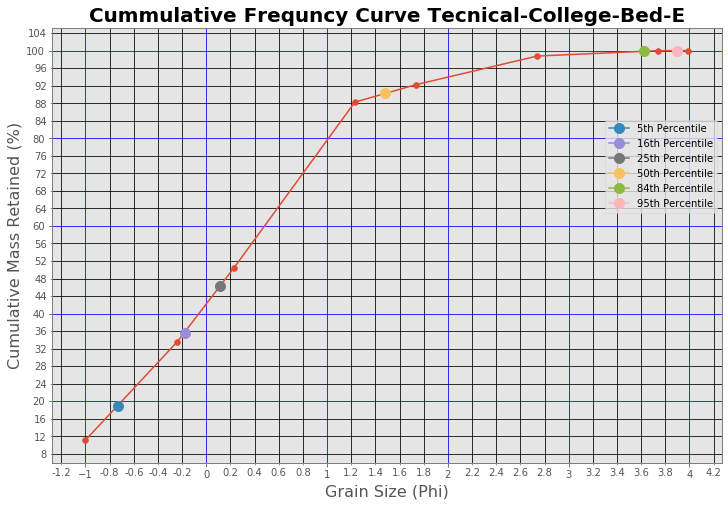

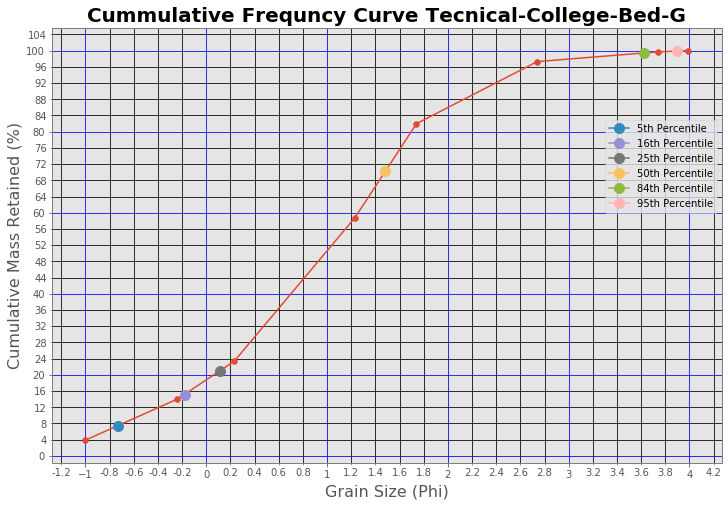

In [35]:
cum_curve(tech_bed_C,percentile_th,'Tecnical-College-Bed-C')
cum_curve(tech_bed_E,percentile_th,'Tecnical-College-Bed-E')
cum_curve(tech_bed_G,percentile_th,'Tecnical-College-Bed-G')

In [26]:
#Amasiri Sandstone 



bed_A=[0.6,10.9,23.8,48,8.9,4.3,1.2,0.1]
bed_B=[8.7,15.3,21.3,39.6,5.9,1.7,1.6,0.9]
bed_C=[4.1,14.0,17.8,44.1,12.6,5.2,1.1,0.2]
bed_D=[3.6,12.0,13.6,39.3,15.1,9.0,3.9,1.3]

In [27]:
Amasiri_A=bed_to_100(bed_A)
Amasiri_B=bed_to_100(bed_B)
Amasiri_C=bed_to_100(bed_C)
Amasiri_D=bed_to_100(bed_D)

In [28]:
Amasiri_A=cummulate_bed(Amasiri_A)
Amasiri_B=cummulate_bed(Amasiri_B)
Amasiri_C=cummulate_bed(Amasiri_C)
Amasiri_D=cummulate_bed(Amasiri_D)

In [29]:
x2,z2,q2=percentiles(Amasiri_A)
x3,z3,q3=percentiles(Amasiri_B)
x4,z4,q4=percentiles(Amasiri_C)
x1,z1,q1=percentiles(Amasiri_D)


In [30]:
amasiri_bed_A= Data_Frame(q2,phi,Amasiri_A)
amasiri_bed_B= Data_Frame(q3,phi,Amasiri_B)
amasiri_bed_C= Data_Frame(q4,phi,Amasiri_C)
amasiri_bed_D= Data_Frame(q1,phi,Amasiri_D)


In [31]:
def phi_percentiles(data,phi_percentile):
    data['Phi_Percentiles']=phi_percentile
    return data

In [33]:
uturu_bed_A=phi_percentiles(uturu_bed_A,[-.75,-.2,.1,1.5,2.9,3.6,3.9,4])
uturu_bed_B=phi_percentiles(uturu_bed_B,[-.8,-.2,.1,1.5,3,3.6,3.8,4])
uturu_bed_D=phi_percentiles(uturu_bed_D,[-.75,-.2,.1,1.45,2.9,3.7,3.9,4])
uturu_bed_E=phi_percentiles(uturu_bed_E,[-.8,-.2,.1,1.45,2.9,3.6,3.9,4])
uturu_bed_G=phi_percentiles(uturu_bed_G,[-.8,-.2,.1,1.5,2.9,3.6,3.9,4])
uturu_bed_H=phi_percentiles(uturu_bed_H,[-.8,-.2,.15,1.5,2.85,3.6,3.8,4])

In [34]:
uturu_bed_H

,Phi_scale,Bed_thickness,Percentiles,Percentile_Passings,Phi_Percentiles
0,-1.00,0.60,5%,2.00,-0.80
1,-0.24,4.60,16%,5.56,-0.20
2,0.23,12.59,25%,10.59,0.15
3,1.23,58.44,50%,71.12,1.50
4,1.74,83.81,75%,96.30,2.85
5,2.74,95.20,84%,99.07,3.60
6,3.74,99.60,95%,99.86,3.80
7,3.99,100.00,99.9%,100.00,4.00


In [35]:
tech_bed_C= phi_percentiles(tech_bed_C,[-.8,-.15,.8,1.5,2.9,3.6,3.9,4])
tech_bed_E=phi_percentiles(tech_bed_E,[-.7,-.2,.1,1.7,2.7,3.65,4,4])
tech_bed_G=phi_percentiles(tech_bed_G,[-.7,-.2,.4,1.45,2.9,3.6,3.9,4])

In [36]:
amasiri_bed_A= phi_percentiles(amasiri_bed_A,[-.7,-.2,.1,1.45,3,3.2,3.65,4])
amasiri_bed_B=phi_percentiles(amasiri_bed_B,[-.75,-.2,.1,1.45,2.8,3.7,3.8,4])
amasiri_bed_C=phi_percentiles(amasiri_bed_C,[-.75,-.2,.15,1.5,2.5,3.6,3.8,4])
amasiri_bed_D=phi_percentiles(amasiri_bed_D,[-.75,-.1,.8,1.45,2.9,3.5,3.75,4])

In [37]:
amasiri_bed_D

,Phi_scale,Bed_thickness,Percentiles,Percentile_Passings,Phi_Percentiles
0,-1.00,3.68,5%,7.97,-0.75
1,-0.24,15.95,16%,17.62,-0.10
2,0.23,29.86,25%,26.38,0.80
3,1.23,70.04,50%,77.76,1.45
4,1.74,85.48,75%,95.68,2.90
5,2.74,94.68,84%,98.19,3.50
6,3.74,98.67,95%,99.53,3.75
7,3.99,100.00,99.9%,99.99,4.00


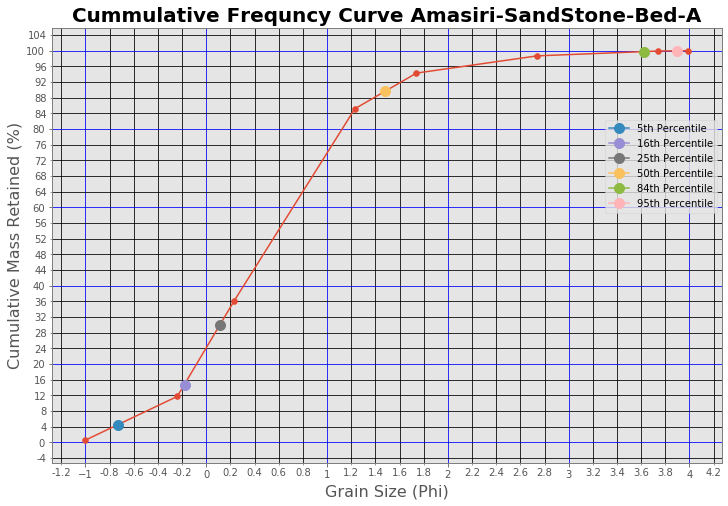

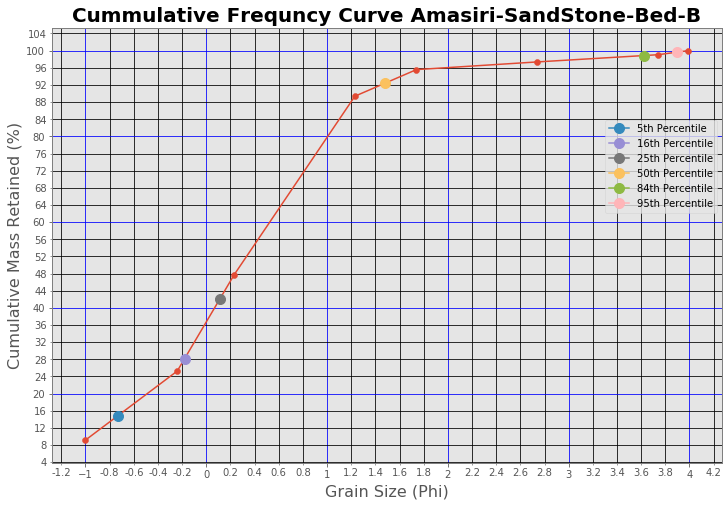

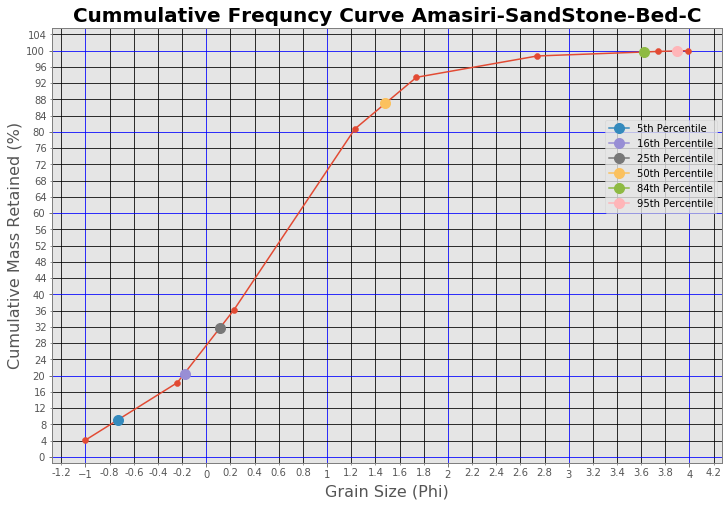

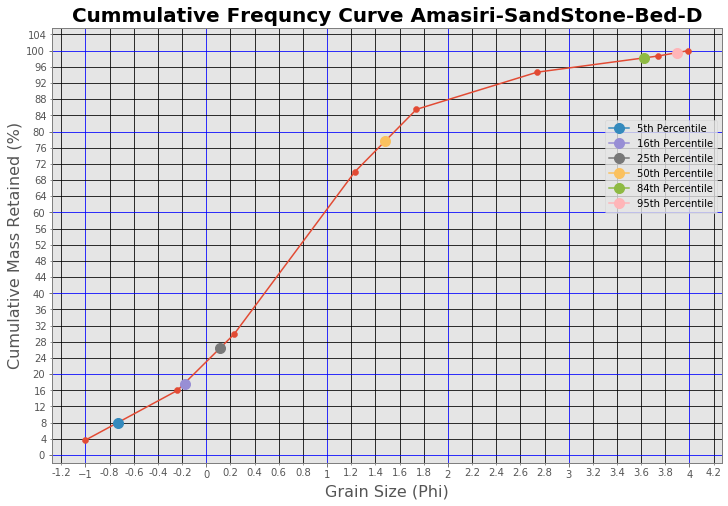

In [34]:
cum_curve(amasiri_bed_A,percentile_th,'Amasiri-SandStone-Bed-A')
cum_curve(amasiri_bed_B,percentile_th,'Amasiri-SandStone-Bed-B')
cum_curve(amasiri_bed_C,percentile_th,'Amasiri-SandStone-Bed-C')
cum_curve(amasiri_bed_D,percentile_th,'Amasiri-SandStone-Bed-D')

In [44]:
'''I used this block to test my logic before building the function'''





# percentat=[]

# per=[5,16,25,50,75,84,95,99]
# percentiles= [5,16,25,50,75,84,95,99]
# phi_t=[]



# for i in percentiles:
#     for j in per:
#         if i == j:
#             percentat.append(round(np.percentile(bed_df.Bed_thickness,i),2))
#             phi_t.append(round(np.percentile(bed_df.Phi_scale,i),2))
# print(phi_t)

# length_phi=[]
# for i in range(len(phi_t)):
#     length_phi.append(i)
    
# print(length_phi)
# if len(per) == 6:
#     fig,ax=plt.subplots(figsize=(10,8))
#     plt.plot(bed_df['Phi_scale'],bed_df['Bed_thickness'])
#     plt.plot(phi_t[0],percentat[0], marker='.', markersize=20, label= f'{per[0]}th Percentile')
#     plt.plot(phi_t[1],percentat[1], marker='.', markersize=20, label= f'{per[1]}th Percentile')
#     plt.plot(phi_t[2],percentat[2], marker='.', markersize=20, label= f'{per[2]}th Percentile')
#     plt.plot(phi_t[3],percentat[3], marker='.', markersize=20, label= f'{per[3]}th Percentile')
#     plt.plot(phi_t[4],percentat[4], marker='.', markersize=20, label= f'{per[4]}th Percentile')
#     plt.plot(phi_t[5],percentat[5], marker='.', markersize=20, label= f'{per[5]}th Percentile')
#     plt.xlabel('Phi Sieve Scale',fontsize=16)
#     plt.ylabel('Passings of Sample',fontsize=16)
#     plt.title('Cummulative Frequncy Curve',fontsize=20,fontweight='bold')
#     plt.legend(bbox_to_anchor=(1,1))
# elif len(per)==8:
#     fig,ax=plt.subplots(figsize=(10,8))
#     plt.plot(bed_df['Phi_scale'],bed_df['Bed_thickness'])
#     plt.plot(phi_t[0],percentat[0], marker='.', markersize=20, label= f'{per[0]}th Percentile')
#     plt.plot(phi_t[1],percentat[1], marker='.', markersize=20, label= f'{per[1]}th Percentile')
#     plt.plot(phi_t[2],percentat[2], marker='.', markersize=20, label= f'{per[2]}th Percentile')
#     plt.plot(phi_t[3],percentat[3], marker='.', markersize=20, label= f'{per[3]}th Percentile')
#     plt.plot(phi_t[4],percentat[4], marker='.', markersize=20, label= f'{per[4]}th Percentile')
#     plt.plot(phi_t[5],percentat[5], marker='.', markersize=20, label= f'{per[5]}th Percentile')
#     plt.plot(phi_t[6],percentat[6], marker='.', markersize=20, label= f'{per[6]}th Percentile')
#     plt.plot(phi_t[7],percentat[7], marker='.', markersize=20, label= f'{per[7]}th Percentile')
#     plt.xlabel('Phi Sieve Scale',fontsize=16)
#     plt.ylabel('Passings of Sample',fontsize=16)
#     plt.title('Cummulative Frequncy Curve',fontsize=20,fontweight='bold')
#     plt.legend(bbox_to_anchor=(1,1))

    

'I use this block to test my logic before building the function'

In [110]:
def plot_data_point(data,name_of_bed):
    fig,ax=plt.subplots(figsize=(12,8))
    plt.plot(data['Phi_scale'],data['Bed_thickness'])
    plt.scatter(data['Phi_scale'],data['Bed_thickness'])
    plt.xlabel('Grain Size (Phi)',fontsize=16)
    plt.ylabel('Cumulative Mass Retained (%)',fontsize=16)
    plt.title(f'Cummulative Frequncy Curve {name_of_bed}',fontsize=20,fontweight='bold')
    plt.legend(bbox_to_anchor=(1,.8))

In [31]:
def cum_curve(data,per,name_of_bed):
    '''This is a function that plots the cummulative curve and indicates percentile passing'''
    percentat=[] #creating a list for percentile based on the percentile that the user wants to plot.
    phi_t=[]#creating a list for the percentiles for the phi scale.
    percentiles= [5,16,25,50,75,84,95,99]

    for i in percentiles:
        for j in per:
            if i == j:
                percentat.append(round(np.percentile(data.Bed_thickness,i),2))
                phi_t.append(round(np.percentile(data.Phi_scale,i),2))
                
                
    #I feel this logic is not smart and flexible for the user. 
    #I could not loop through the dataframe to produce the plot so I had to use switch statements
    #I did not also try to take care of errors.
    
    
    
    if len(per) == 6:
        fig,ax=plt.subplots(figsize=(12,8))
        plt.plot(data['Phi_scale'],data['Bed_thickness'])
        plt.scatter(data['Phi_scale'],data['Bed_thickness'])
        plt.plot(phi_t[0],percentat[0], marker='.', markersize=20, label= f'{per[0]}th Percentile')
        plt.plot(phi_t[1],percentat[1], marker='.', markersize=20, label= f'{per[1]}th Percentile')
        plt.plot(phi_t[2],percentat[2], marker='.', markersize=20, label= f'{per[2]}th Percentile')
        plt.plot(phi_t[3],percentat[3], marker='.', markersize=20, label= f'{per[3]}th Percentile')
        plt.plot(phi_t[4],percentat[4], marker='.', markersize=20, label= f'{per[4]}th Percentile')
        plt.plot(phi_t[5],percentat[5], marker='.', markersize=20, label= f'{per[5]}th Percentile')

        ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
        ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
        ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
        ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
       

        plt.rc('grid', linestyle="-", color='black')
        ax.spines['bottom'].set_color('1.5')
        ax.spines['top'].set_color('1.5')
        ax.spines['right'].set_color('1.5')
        ax.spines['left'].set_color('1.5')
        plt.grid(True, which='minor', color='k', linestyle='-')
        plt.grid(True, which='major', color='b', linestyle='-')
        plt.xlabel('Grain Size (Phi)',fontsize=16)
        plt.ylabel('Cumulative Mass Retained (%)',fontsize=16)
        plt.title(f'Cummulative Frequncy Curve {name_of_bed}',fontsize=20,fontweight='bold')
        plt.legend(bbox_to_anchor=(1,.8))
        fig.savefig(f'{name_of_bed}.png',pdi=fig.dpi)
        data.to_csv(f'{name_of_bed}.csv', index=False)
        
    
    
    
    elif len(per)==8:
        fig,ax=plt.subplots(figsize=(10,8))
        plt.plot(bed_df['Phi_scale'],bed_df['Bed_thickness'])
        plt.plot(phi_t[0],percentat[0], marker='.', markersize=20, label= f'{per[0]}th Percentile')
        plt.plot(phi_t[1],percentat[1], marker='.', markersize=20, label= f'{per[1]}th Percentile')
        plt.plot(phi_t[2],percentat[2], marker='.', markersize=20, label= f'{per[2]}th Percentile')
        plt.plot(phi_t[3],percentat[3], marker='.', markersize=20, label= f'{per[3]}th Percentile')
        plt.plot(phi_t[4],percentat[4], marker='.', markersize=20, label= f'{per[4]}th Percentile')
        plt.plot(phi_t[5],percentat[5], marker='.', markersize=20, label= f'{per[5]}th Percentile')
        plt.plot(phi_t[6],percentat[6], marker='.', markersize=20, label= f'{per[6]}th Percentile')
        plt.plot(phi_t[7],percentat[7], marker='.', markersize=20, label= f'{per[7]}th Percentile')
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
        ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
       

        plt.rc('grid', linestyle="-", color='black')
        ax.spines['bottom'].set_color('1.5')
        ax.spines['top'].set_color('1.5')
        ax.spines['right'].set_color('1.5')
        ax.spines['left'].set_color('1.5')
        plt.grid(True, which='minor', color='k', linestyle='-')
        plt.grid(True, which='major', color='k', linestyle='-')
        plt.xlabel('Phi Sieve Scale',fontsize=16)
        plt.ylabel('Passings of Sample',fontsize=16)
        plt.title(f'Cummulative Frequncy Curve {name_of_bed}',fontsize=20,fontweight='bold')
        plt.legend(bbox_to_anchor=(1,.8))
#         fig.savefig(f'{name_of_bed}.png',pdi=fig.dpi)
#         data.to_csv(f'{name_of_bed}.csv', index=False)
    

In [32]:
percentile_th=[5,16,25,50,84,95]


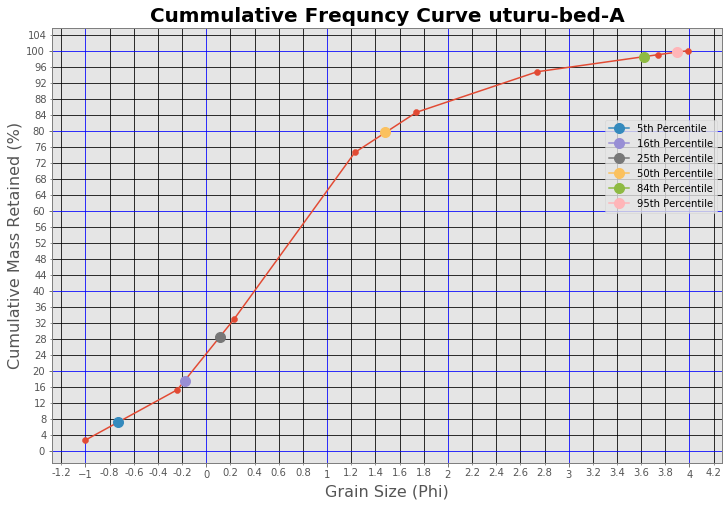

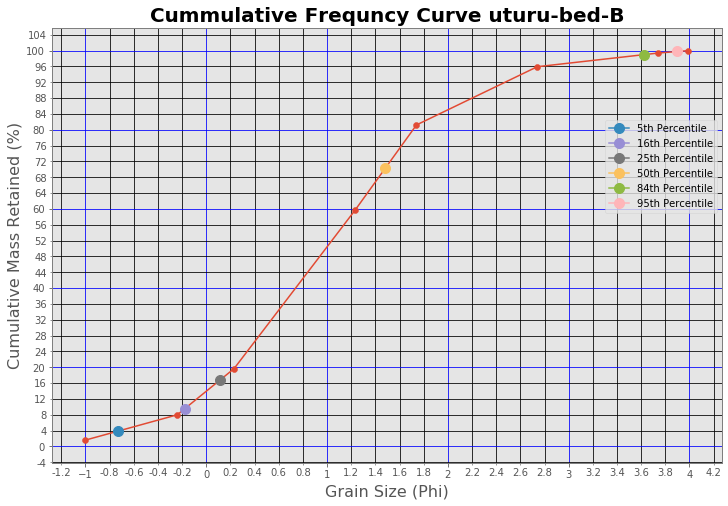

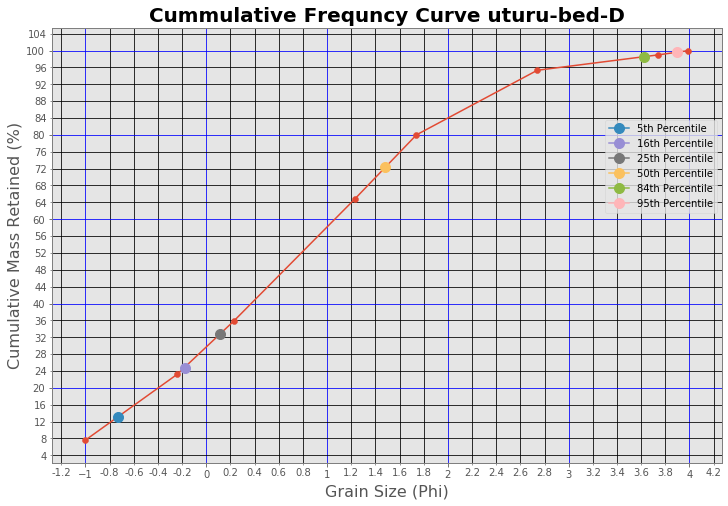

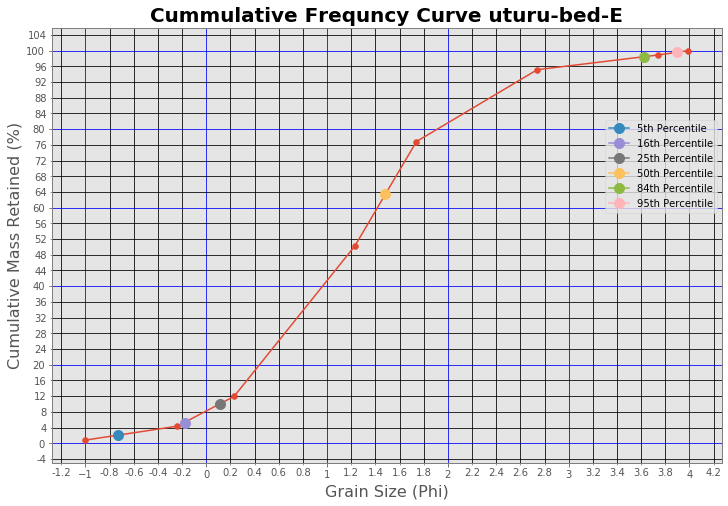

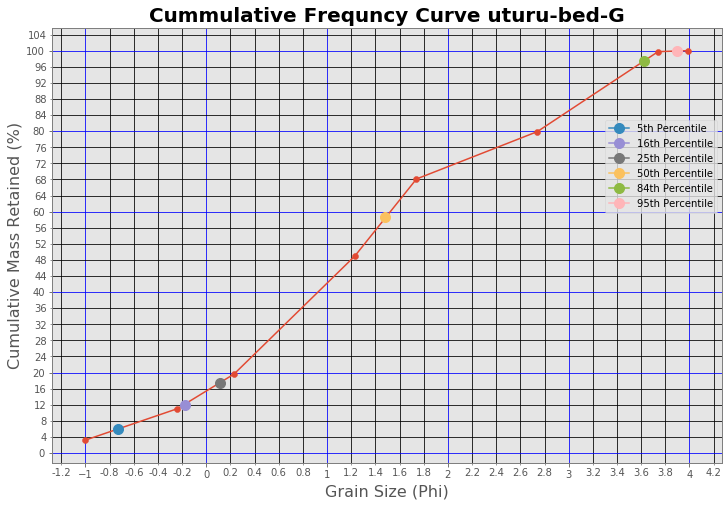

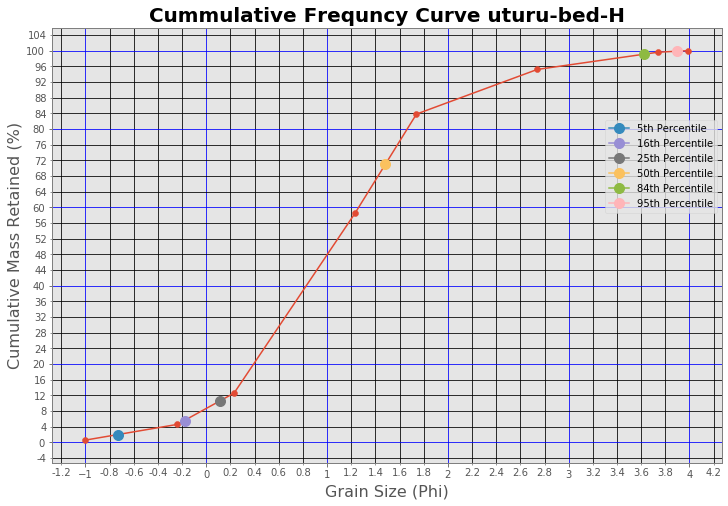

In [33]:
percentile_th=[5,16,25,50,84,95]


cum_curve(uturu_bed_A,percentile_th,'uturu-bed-A')
cum_curve(uturu_bed_B,percentile_th,'uturu-bed-B')
cum_curve(uturu_bed_D,percentile_th,'uturu-bed-D')
cum_curve(uturu_bed_E,percentile_th,'uturu-bed-E')
cum_curve(uturu_bed_G,percentile_th,'uturu-bed-G')
cum_curve(uturu_bed_H,percentile_th,'uturu-bed-H')

## Functions for summerizing Grain data

In [109]:
def phi_percentiles(data,phi_percentile):
    data['Phi_Percentiles']=phi_percentile
    return data

In [102]:
def graphic_mean(data):
    
    '''A function to calculate the graphic mean for the Data'''

    
#     percentiles = [16,50,84]
    phi_percentile=list(data.Phi_Percentiles) 
   
        
    sumation=phi_percentile[1] + phi_percentile[3] + phi_percentile[5]
     
    
    graphicMean= round((sumation/3),2)
        
    return graphicMean

In [47]:
def graphic_stand_dev(data):
    
    '''A function to calculate the graphic standard devietion for the Data'''

#     percentiles_right = [95,5]
#     percentiles_left = [84,16]
    phi_percentile=list(data.Phi_Percentiles)
    
    
    
#     for i in percentiles_left:
#         left_side.append(round(np.percentile(data.Phi_scale,i),2))
    
    
#     for j in percentiles_right:
#         right_side.append(round(np.percentile(data.Phi_scale,j),2))

    left_math = phi_percentile[5] - phi_percentile[1]
    right_math = phi_percentile[6] - phi_percentile[0]
    
    graphic_std = round((left_math/ 4) + (right_math/6.6),2)
        
    return graphic_std

In [49]:
graphic_stand_dev(uturu_bed_A)

1.65

In [89]:
def graphic_skewness(data):
    '''Function of the graphic_skewness'''
    #percentiles = [5,16,50,84,95]
    
    
    phi_percentile=list(data.Phi_Percentiles)
    
    
    
    
    left_numerator = phi_percentile[5] + phi_percentile[1]- (2 * phi_percentile[3])
    right_numerator = (phi_percentile[6] + phi_percentile[0])- (2* phi_percentile[3])
    
    left_denometer = 2 *(phi_percentile[5]- phi_percentile[1])
    right_denometer = 2 *(phi_percentile[6] - phi_percentile[0])
    graph_skew = round((left_numerator/left_denometer) + (right_numerator/right_denometer),3)



    return graph_skew
    

In [61]:
graphic_skew=graphic_skewness(uturu_bed_H)
graphic_skew

0.05

In [62]:
def Graphic_Kurtosis(data):
    '''
    This is a function for Graphic Kurtosis
    '''
    
#     percentile = [5,25,75,95]
    
    phi_percentile=list(data.Phi_Percentiles)
    
    numerator = phi_percentile[6] - phi_percentile[0]
    denumator = 2.44*(phi_percentile[4] - phi_percentile[3])
    
    graphic_kurtosis = round((numerator / denumator),2)
    return graphic_kurtosis

In [63]:
Graphic_Kurtosis(uturu_bed_H)

1.4

In [76]:
def Bed_data(name_of_bed,graphic_mean,graphic_std,graphic_skewness,graphic_kurtosis):
    
    name = name_of_bed
    graphic_mean=graphic_mean
    graphic_standard_dev=graphic_std
    graphic_skewness = graphic_skewness
    graphic_kurtosis= graphic_kurtosis
    
    bed_stat_data = pd.DataFrame({'Name_of_bed':[name],
                      'Graphic Mean':[graphic_mean],
                      'Graphic Standard deviation':[graphic_standard_dev],
                       'Graphic Skewness':[graphic_skewness],
                      'Graphic Kurtosis':[graphic_kurtosis]
                     })
    
    return bed_stat_data

In [77]:
def compelte_bed_data(bed_stat,name_of_bed,graphic_mean,graphic_std,graphic_skewness,graphic_kurtosis):
    
    name = name_of_bed
    graphic_mean=graphic_mean
    graphic_standard_dev=graphic_std
    graphic_skewness = graphic_skewness
    graphic_kurtosis= graphic_kurtosis
    
    update={'Name_of_bed':name,
                      'Graphic Mean':graphic_mean,
                      'Graphic Standard deviation':graphic_standard_dev,
                       'Graphic Skewness':graphic_skewness,
                      'Graphic Kurtosis':graphic_kurtosis
                     }
    bed_stat =bed_stat.append(update,ignore_index=True)
    
    return bed_stat
    

In [78]:
def save_bed_data(data,name_of_rock_unit):
    data=data
    name= name_of_rock_unit
    
    data.to_csv(f'{name}.csv')

##  Uturu_Bed_Data

In [64]:
graphic_mean_utr_bed_A=graphic_mean(uturu_bed_A)
graphic_mean_utr_bed_B=graphic_mean(uturu_bed_B)
graphic_mean_utr_bed_D=graphic_mean(uturu_bed_D)
graphic_mean_utr_bed_E=graphic_mean(uturu_bed_E)
graphic_mean_utr_bed_G=graphic_mean(uturu_bed_G)
graphic_mean_utr_bed_H=graphic_mean(uturu_bed_H)

In [65]:


graphic_std_utr_bed_A=graphic_stand_dev(uturu_bed_A)
graphic_std_utr_bed_B=graphic_stand_dev(uturu_bed_B)
graphic_std_utr_bed_D=graphic_stand_dev(uturu_bed_D)
graphic_std_utr_bed_E=graphic_stand_dev(uturu_bed_E)
graphic_std_utr_bed_G=graphic_stand_dev(uturu_bed_G)
graphic_std_utr_bed_H=graphic_stand_dev(uturu_bed_H)

In [66]:


graphic_skew_utr_bed_A=graphic_skewness(uturu_bed_A)
graphic_skew_utr_bed_B=graphic_skewness(uturu_bed_B)
graphic_skew_utr_bed_D=graphic_skewness(uturu_bed_D)
graphic_skew_utr_bed_E=graphic_skewness(uturu_bed_E)
graphic_skew_utr_bed_G=graphic_skewness(uturu_bed_G)
graphic_skew_utr_bed_H=graphic_skewness(uturu_bed_H)

In [67]:


graphic_k_utr_bed_A=Graphic_Kurtosis(uturu_bed_A)
graphic_k_utr_bed_B=Graphic_Kurtosis(uturu_bed_B)
graphic_k_utr_bed_D=Graphic_Kurtosis(uturu_bed_D)
graphic_k_utr_bed_E=Graphic_Kurtosis(uturu_bed_E)
graphic_k_utr_bed_G=Graphic_Kurtosis(uturu_bed_G)
graphic_k_utr_bed_H=Graphic_Kurtosis(uturu_bed_H)

In [68]:
graphic_k_utr_bed_G

1.38

In [69]:
name_of_bed = 'Uturu_bed_A'


In [71]:
bed_stat = Bed_data(name_of_bed,graphic_mean_utr_bed_A,graphic_std_utr_bed_A,graphic_skew_utr_bed_A,graphic_k_utr_bed_A)

bed_stat

,Name_of_bed,Graphic Mean,Graphic Standard deviation,Graphic Skewness,Graphic Kurtosis
0,Uturu_bed_A,1.63,1.65,0.07,1.36


In [73]:
data=compelte_bed_data(bed_stat,'Uturu_bed_B',graphic_mean_utr_bed_B,graphic_std_utr_bed_B,graphic_skew_utr_bed_B,graphic_k_utr_bed_B)
data=compelte_bed_data(data,'Uturu_bed_D',graphic_mean_utr_bed_D,graphic_std_utr_bed_D,graphic_skew_utr_bed_D,graphic_k_utr_bed_D)
data=compelte_bed_data(data,'Uturu_bed_E',graphic_mean_utr_bed_E,graphic_std_utr_bed_E,graphic_skew_utr_bed_E,graphic_k_utr_bed_E)
data=compelte_bed_data(data,'Uturu_bed_G',graphic_mean_utr_bed_G,graphic_std_utr_bed_G,graphic_skew_utr_bed_G,graphic_k_utr_bed_G)
data=compelte_bed_data(data,'Uturu_bed_H',graphic_mean_utr_bed_H,graphic_std_utr_bed_H,graphic_skew_utr_bed_H,graphic_k_utr_bed_H)

data

,Name_of_bed,Graphic Mean,Graphic Standard deviation,Graphic Skewness,Graphic Kurtosis
0,Uturu_bed_A,1.63,1.65,0.07,1.36
1,Uturu_bed_B,1.63,1.65,0.05,1.26
2,Uturu_bed_D,1.65,1.68,0.10,1.31
3,Uturu_bed_E,1.62,1.66,0.09,1.33
4,Uturu_bed_G,1.63,1.66,0.06,1.38
5,Uturu_bed_H,1.63,1.65,0.05,1.40


In [75]:
save_bed_data(data,'Uturu_beds')

## Technical college beds 



In [79]:
graphic_mean_tech_bed_C=graphic_mean(tech_bed_C)

graphic_mean_tech_bed_E=graphic_mean(tech_bed_E)
graphic_mean_tech_bed_G=graphic_mean(tech_bed_G)


In [80]:

graphic_std_tech_bed_C=graphic_stand_dev(tech_bed_C)
graphic_std_tech_bed_E=graphic_stand_dev(tech_bed_E)
graphic_std_tech_bed_G=graphic_stand_dev(tech_bed_G)


In [92]:

graphic_skew_tech_bed_C=graphic_skewness(tech_bed_C)
graphic_skew_tech_bed_E=graphic_skewness(tech_bed_E)
graphic_skew_tech_bed_G=graphic_skewness(tech_bed_G)

graphic_skew_tech_bed_E


-0.004

In [82]:

graphic_k_tech_bed_C=Graphic_Kurtosis(tech_bed_C)
graphic_k_tech_bed_E=Graphic_Kurtosis(tech_bed_E)
graphic_k_tech_bed_G=Graphic_Kurtosis(tech_bed_G)




In [85]:
bed_stat = Bed_data('Tech_bed_C',graphic_mean_tech_bed_C,graphic_std_tech_bed_C,graphic_skew_tech_bed_C,graphic_k_tech_bed_C)

bed_stat

,Name_of_bed,Graphic Mean,Graphic Standard deviation,Graphic Skewness,Graphic Kurtosis
0,Tech_bed_C,1.65,1.65,0.07,1.38


In [93]:
data=compelte_bed_data(bed_stat,'Tech_bed_E',graphic_mean_tech_bed_E,graphic_std_tech_bed_E,graphic_skew_tech_bed_E,graphic_k_tech_bed_E)

data=compelte_bed_data(data,'Tech_bed_G',graphic_mean_tech_bed_G,graphic_std_tech_bed_G,graphic_skew_tech_bed_G,graphic_k_tech_bed_G)


data

,Name_of_bed,Graphic Mean,Graphic Standard deviation,Graphic Skewness,Graphic Kurtosis
0,Tech_bed_C,1.65,1.65,0.070,1.38
1,Tech_bed_E,1.72,1.67,-0.004,1.93
2,Tech_bed_G,1.62,1.65,0.098,1.30


In [94]:
save_bed_data(data,'Technical_college_Beds')

## Amasiri Beds 

In [95]:
graphic_mean_amasiri_bed_A=graphic_mean(amasiri_bed_A)

graphic_mean_amasiri_bed_B=graphic_mean(amasiri_bed_B)
graphic_mean_amasiri_bed_C=graphic_mean(amasiri_bed_C)
graphic_mean_amasiri_bed_D=graphic_mean(amasiri_bed_D)


In [96]:

graphic_std_amasiri_bed_A=graphic_stand_dev(amasiri_bed_A)
graphic_std_amasiri_bed_B=graphic_stand_dev(amasiri_bed_B)
graphic_std_amasiri_bed_C=graphic_stand_dev(amasiri_bed_C)
graphic_std_amasiri_bed_D=graphic_stand_dev(amasiri_bed_D)


In [97]:

graphic_skew_amasiri_bed_A=graphic_skewness(amasiri_bed_A)
graphic_skew_amasiri_bed_B=graphic_skewness(amasiri_bed_B)
graphic_skew_amasiri_bed_C=graphic_skewness(amasiri_bed_C)
graphic_skew_amasiri_bed_D=graphic_skewness(amasiri_bed_D)



In [98]:

graphic_k_amasiri_bed_A=Graphic_Kurtosis(amasiri_bed_A)
graphic_k_amasiri_bed_B=Graphic_Kurtosis(amasiri_bed_B)
graphic_k_amasiri_bed_C=Graphic_Kurtosis(amasiri_bed_C)
graphic_k_amasiri_bed_D=Graphic_Kurtosis(amasiri_bed_D)




In [99]:
bed_stat = Bed_data('Amasiri_bed_A',graphic_mean_amasiri_bed_A,graphic_std_amasiri_bed_A,graphic_skew_amasiri_bed_A,graphic_k_amasiri_bed_A)

bed_stat

,Name_of_bed,Graphic Mean,Graphic Standard deviation,Graphic Skewness,Graphic Kurtosis
0,Amasiri_bed_A,1.48,1.51,0.02,1.15


In [100]:
data=compelte_bed_data(bed_stat,'Amasiri_Bed_B',graphic_mean_amasiri_bed_B,graphic_std_amasiri_bed_B,graphic_skew_amasiri_bed_B,graphic_k_amasiri_bed_B)

data=compelte_bed_data(data,'Amasiri_bed_C',graphic_mean_amasiri_bed_C,graphic_std_amasiri_bed_C,graphic_skew_amasiri_bed_C,graphic_k_amasiri_bed_C)
data = compelte_bed_data(data,'Amasiri_bed_D',graphic_mean_amasiri_bed_D,graphic_std_amasiri_bed_D,graphic_skew_amasiri_bed_D,graphic_k_amasiri_bed_D)


data

,Name_of_bed,Graphic Mean,Graphic Standard deviation,Graphic Skewness,Graphic Kurtosis
0,Amasiri_bed_A,1.48,1.51,0.020,1.15
1,Amasiri_Bed_B,1.65,1.66,0.093,1.38
2,Amasiri_bed_C,1.63,1.64,0.058,1.86
3,Amasiri_bed_D,1.62,1.58,0.081,1.27


In [101]:
save_bed_data(data,'Amasiri_Beds')

In [39]:
#TO create a function for navigating Working and create directories for the rocks 



import os 


def rock_sample_directory():
    print(os.getcwd())


In [ ]:
{'Name_of_bed':[name],
                      'Graphic Mean':[graphic_mean_bed_B],
                      'Graphic Standard deviation':[graphic_std_bed_B],
                       'Graphic Skewness':[graphic_skew_utr_bed_B],
                      'Graphic Kurtosis':[graphic_k_utr_bed_B]
                     })

In [ ]:
rock_sample_directory()

In [ ]:
# def rock_dir(name):
#     name=name
#     path= os.path.join(os.getcwd(),name)
#     if os.path.exists(path) & os.path.isdir(path):
#         print(path, ':exists and it is a directory')
#         os.chdir(path)
#         print(os.getcwd())
#     else:
#          os.mkdir(path)
#     os.chdir(path)
#     #changing working directory
#     print(os.getcwd())

In [ ]:
#new=rock_dir('Uturu_Sandstone')



In [ ]:
#rock_sample_directory()

In [40]:
bed= pd.read_csv('./Uturu_Sandstone/uturu-bed-H.csv')

bed

,Phi_scale,Bed_thickness,Percentiles,Percentile_Passings,Phi_percentile
0,-1.00,0.60,5%,2.00,-0.73
1,-0.24,4.60,16%,5.56,-0.18
2,0.23,12.59,25%,10.59,0.11
3,1.23,58.44,50%,71.12,1.48
4,1.74,83.81,75%,96.30,2.99
5,2.74,95.20,84%,99.07,3.62
6,3.74,99.60,95%,99.86,3.90
7,3.99,100.00,99.9%,100.00,3.99


In [ ]:
bed.describe()

In [ ]:
plt.plot()